<a href="https://colab.research.google.com/github/seanteo0206/Python-Practice/blob/main/wise_time_series_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series in Python

## What is a time series?

A time series is a series of data points that's indexed (or listed, or graphed) in time order. Most commonly, a time series is a sequence that's taken at successive equally spaced points in time. Time series are often represented as a set of observations that have a time-bound relation, which is represented as an index.

Time series are commonly found in sales, analysis, stock market trends, economic phenomena, and social science problems.

These data sets are often investigated to evaluate the long-term trends, forecast the future, or perform some other form of analysis.

# <font color='blue'>Time series in Python

## Case study: Rossmann sales

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# time series and metrics
from prophet import Prophet
import xgboost as xgb
from sklearn.metrics import mean_squared_error

For Google Drive you can either drag & drop data files to the File Browser on the left (they're temporary) or mount your Google Drive. For more information see here: https://neptune.ai/blog/google-colab-dealing-with-files

In [ ]:
df = pd.read_csv('rossmann.csv')
df.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,5,2015-07-31,5263,555,1,1,0,1
1,4,2015-07-30,5020,546,1,1,0,1
2,3,2015-07-29,4782,523,1,1,0,1
3,2,2015-07-28,5011,560,1,1,0,1
4,1,2015-07-27,6102,612,1,1,0,1


When working with date/time data we want our column to be a `datetime` type

In [ ]:
df.dtypes

DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].head()

0   2015-07-31
1   2015-07-30
2   2015-07-29
3   2015-07-28
4   2015-07-27
Name: Date, dtype: datetime64[ns]

In [ ]:
df.dtypes

DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

If our data had a strange date format we can tell pandas what to expect by passing the `format` parameter. This takes the form of a string representing a sample date, with placeholders for the different components (year, month, day etc.).

In this case it would be:

`year-month-day`

which becomes:

`"%Y-%m-%d"`

(if you want to know all the placeholder options, visit https://strftime.org/)

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df["Date"].head()

0   2015-07-31
1   2015-07-30
2   2015-07-29
3   2015-07-28
4   2015-07-27
Name: Date, dtype: datetime64[ns]

Once you have a datetime type, you can access the `.dt` property for additional date-specific properties and methods:

In [ ]:
# extract year and month columns for use later
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,4,2015-07-30,5020,546,1,1,0,1,2015,7
2,3,2015-07-29,4782,523,1,1,0,1,2015,7
3,2,2015-07-28,5011,560,1,1,0,1,2015,7
4,1,2015-07-27,6102,612,1,1,0,1,2015,7


You can also represent a datetime type as text using the `strftime` method (using the same placeholders as above):

In [ ]:
df["Date"].dt.strftime("%d %B %Y").head()

0    31 July 2015
1    30 July 2015
2    29 July 2015
3    28 July 2015
4    27 July 2015
Name: Date, dtype: object

### Plotting time series

Now we have a datetime type we can manipulate our data more easily by setting our DataFrame's index to be the date column

In [ ]:
df.set_index("Date").head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,
2015-07-31,5,5263,555,1,1,0,1,2015,7
2015-07-30,4,5020,546,1,1,0,1,2015,7
2015-07-29,3,4782,523,1,1,0,1,2015,7
2015-07-28,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,6102,612,1,1,0,1,2015,7


Plotting becomes nice and clean because the datetime index will give us time on the x-axis automatically

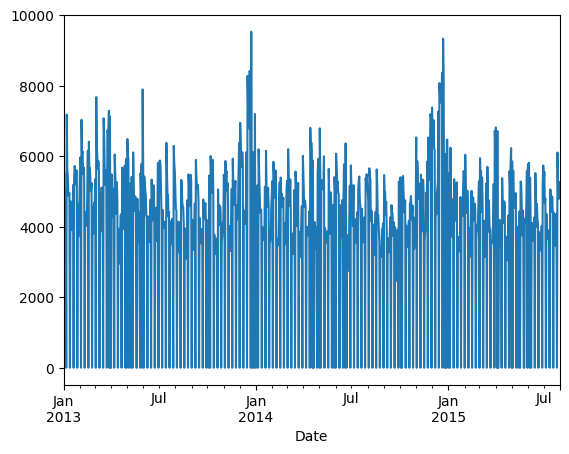

In [ ]:
df.set_index("Date")["Sales"].plot();

You may have noticed by now that for some reason our dataset is in reverse time order. You wouldn't know it from the plot above, because when using a datetimeindex pandas just sorts out the ordering for you. However, if you want to do other operations, including decomposing the series, you are better off ensuring the dataset is in the right order.

In [ ]:
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

Now the index has been set permanently (using `inplace`) we can just plot our sales column and pandas/matplotlib will know to put time on the x-axis

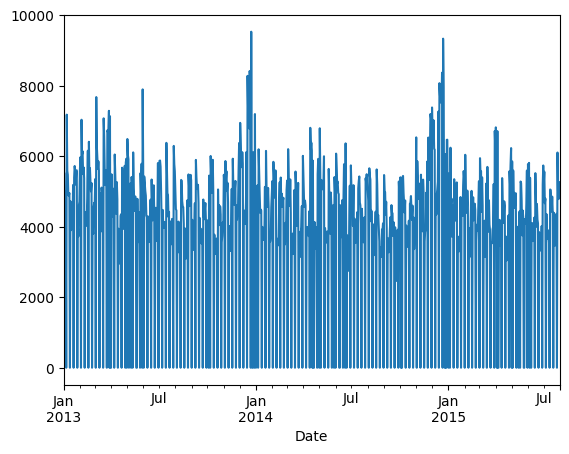

In [ ]:
df["Sales"].plot();

Look at those zeros!

In [ ]:
df.head(7)

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,
2013-01-01,2,0,0,0,0,a,1,2013,1
2013-01-02,3,5530,668,1,0,0,1,2013,1
2013-01-03,4,4327,578,1,0,0,1,2013,1
2013-01-04,5,4486,619,1,0,0,1,2013,1
2013-01-05,6,4997,635,1,0,0,1,2013,1
2013-01-06,7,0,0,0,0,0,1,2013,1
2013-01-07,1,7176,785,1,1,0,1,2013,1


### Resampling

One way to "fix" this is to aggregate the data to a different level of granularity using the built in `resample` method, which requires our index to be a datetime

In [ ]:
# weekly, basically saying "group by week"
(df.resample("W")["Sales"].mean()).head()

Date
2013-01-06    3223.333333
2013-01-13    4707.428571
2013-01-20    3711.142857
2013-01-27    4724.428571
2013-02-03    4099.000000
Freq: W-SUN, Name: Sales, dtype: float64

See all your resampling options: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

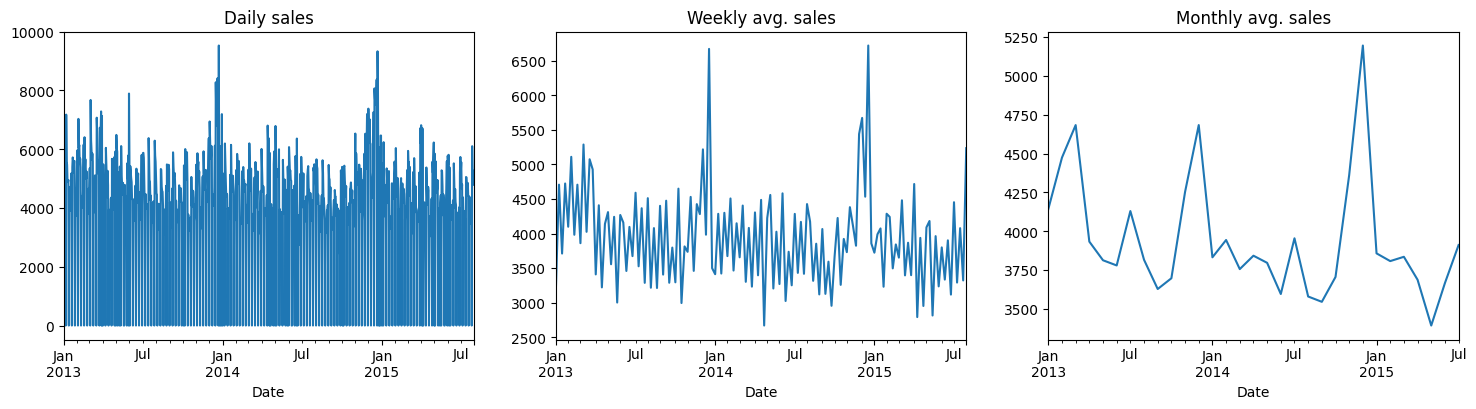

In [ ]:
# create 3 plots side-by-side
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# ax is now a list of axes
df["Sales"].plot(ax=ax[0], title="Daily sales")

df.resample("W")["Sales"].mean().plot(ax=ax[1], title="Weekly avg. sales")

df.resample("MS")["Sales"].mean().plot(ax=ax[2], title="Monthly avg. sales")

plt.show()

#### What do we think about trend and seasonality?

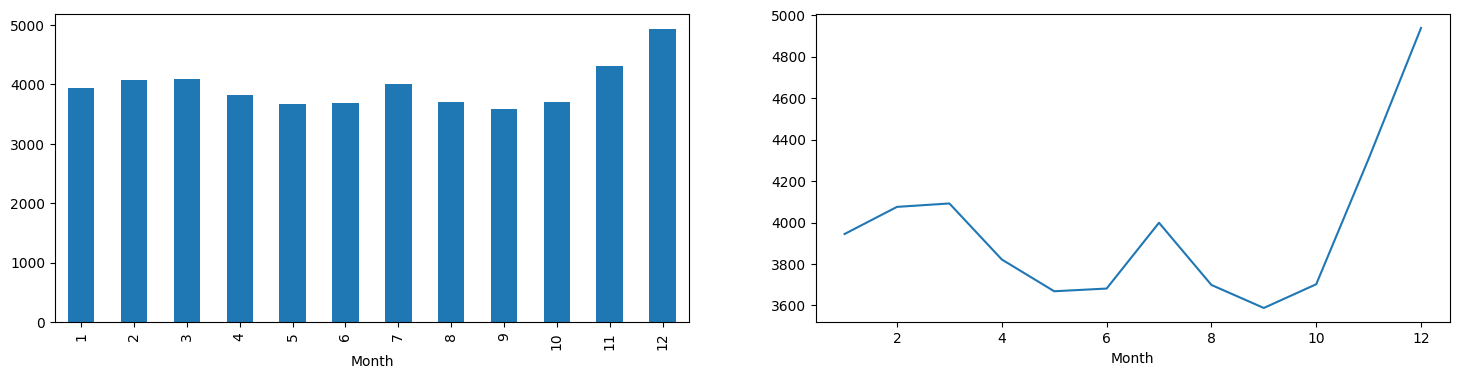

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
df.groupby("Month")["Sales"].mean().plot.bar(ax=ax[0])
df.groupby("Month")["Sales"].mean().plot(ax=ax[1])
plt.show()

Another option is to smooth our time series using the `rolling` method. Requires us to specify:

- `window`: how many values to "roll"?
- `center`: is the value for the window the center or the end?

In [ ]:
df["Sales"].rolling(window=3, center=True).mean().head()

Date
2013-01-01            NaN
2013-01-02    3285.666667
2013-01-03    4781.000000
2013-01-04    4603.333333
2013-01-05    3161.000000
Name: Sales, dtype: float64

This is now an average of the previous, current and next values. The first row has no "previous" values so it becomes `NaN`

In [ ]:
df["Sales"].rolling(window=3, center=False).mean().head()

Date
2013-01-01            NaN
2013-01-02            NaN
2013-01-03    3285.666667
2013-01-04    4781.000000
2013-01-05    4603.333333
Name: Sales, dtype: float64

Setting `center=False` means the rolling 3-day value will be the average of the previous 2 values plus the current. The first two rows have no "previous 2" values, so are both `NaN`

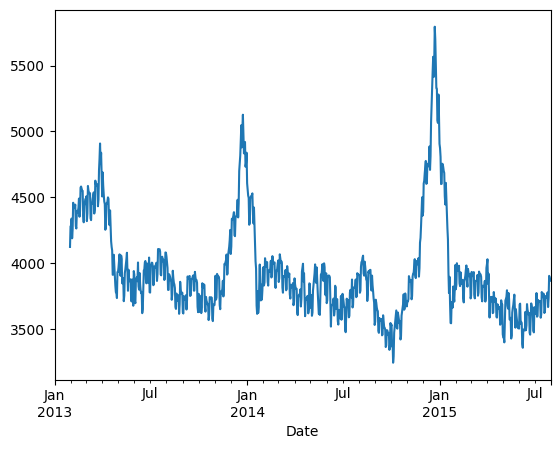

In [ ]:
df["Sales"].rolling(window=30, center=False).mean().plot();

# <font color='red'> Exercise 1: Exploring time series

Time to practise your new time series skills!
    
### 1. First, write code to represent the date column of the `df` DataFrame in the following string format: "Friday Jul 31 15"
    
- 31 represents the day, 15 is the year
- refer to https://strftime.org to help you

### 2. Now resample the sales data to calculate the average sales figure per quarter

Use the **start** of the quarter, so your first value should be 2013-01-01.

Refer to this page in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

### 3. Show the distribution of sales per day of the week

Use a boxplot to do this and the `DayOfWeek` column

### 4. Let's verify what the numbers behind the `DayOfWeek` column represent

Using your answer to question 1 to help you, what do the values in `DayOfWeek` match to? Does the week start on 0 or 1?

### 5. Based on your answers, what do you conclude about a pattern among weekdays?

# <font color='blue'>Elements of a time series

Splitting a time series into several components is useful for both understanding the data and diagnosing the appropriate forecasting model. Each of these components will represent an underlying pattern.

**Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes, we will refer to a trend “changing direction” when, for example, it might go from an increasing trend to a decreasing trend.

**Seasonal**: A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.

**Residual**: The leftover or error component.

Let's decompose our sales time series!

In [ ]:
df.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,
2013-01-01,2,0,0,0,0,a,1,2013,1
2013-01-02,3,5530,668,1,0,0,1,2013,1
2013-01-03,4,4327,578,1,0,0,1,2013,1
2013-01-04,5,4486,619,1,0,0,1,2013,1
2013-01-05,6,4997,635,1,0,0,1,2013,1


Because the store isn't always open, and closed on Sundays, trying to decompose a patchy time series will not work. Resampling at the weekly level ensures we have no gaps.

In [ ]:
weekly_sales = df.resample("W")["Sales"].mean()
weekly_sales.head()

Date
2013-01-06    3223.333333
2013-01-13    4707.428571
2013-01-20    3711.142857
2013-01-27    4724.428571
2013-02-03    4099.000000
Freq: W-SUN, Name: Sales, dtype: float64

First things first, plot the data.

What do we think about trend and seasonality?

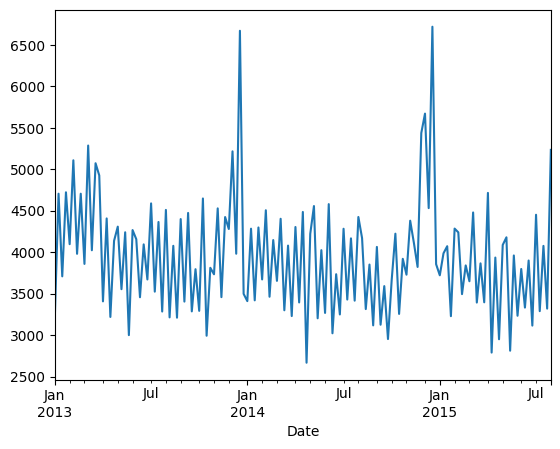

In [ ]:
weekly_sales.plot();

The trend is unclear, perhaps slightly downward. There's a lot of "up and down" movement so maybe a 2-weekly pattern, or perhaps a monthly one.

We can use our standard EDA toolbox to investigate further.

Let's resample to a yearly interval and measure average weekly sales for each year.

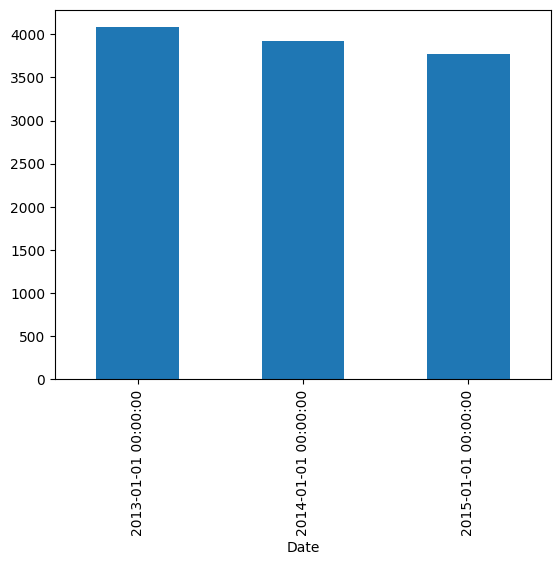

In [ ]:
(
    weekly_sales
    .resample("YS") # group by year (using Jan 1)
    .mean() # aggregate average weekly sales/year
    .plot.bar() # plot as a bar chart
);

This suggests a slight downward trend, at least year-on-year, but we have to remember we only have half a year of data for 2015.

What about monthly patterns?

To get monthly averages we want to **group by** the month (1-12) rather than resample. Resample would use months as dates, so Jan 1960, Feb 1960 etc. whereas grouping by the month property gives us months as months of the year (average sales across all Januaries, Februaries etc.)

In [ ]:
weekly_sales

Date
2013-01-06    3223.333333
2013-01-13    4707.428571
2013-01-20    3711.142857
2013-01-27    4724.428571
2013-02-03    4099.000000
                 ...     
2015-07-05    4453.571429
2015-07-12    3291.571429
2015-07-19    4078.285714
2015-07-26    3322.285714
2015-08-02    5235.600000
Freq: W-SUN, Name: Sales, Length: 135, dtype: float64

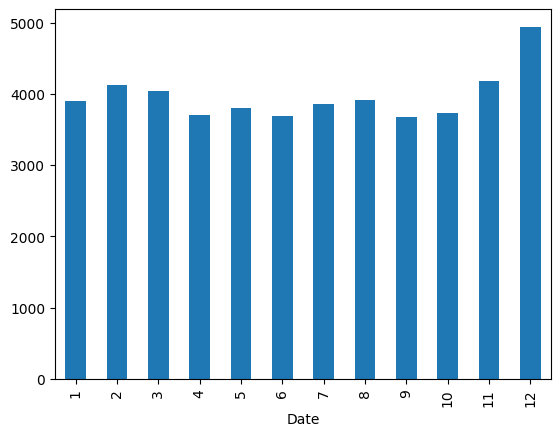

In [ ]:
(
    weekly_sales
    .groupby(weekly_sales.index.month) # group by month rather than resample by month
    .mean()
    .plot.bar()
);

Unsurprisingly we see an uplift in November leading to a Christmas peak, then right back down in January. Mostly constant for the rest of the year.

We've explored how to use existing EDA methods to get a sense of trend and seasonality, but to be more precise we can use the `seasonal_decompose()` function to break the time series into its constituent parts.

The decomposition object from seasonal_decompose() has a .plot() function, like with Pandas DataFrames.

<Figure size 640x480 with 0 Axes>

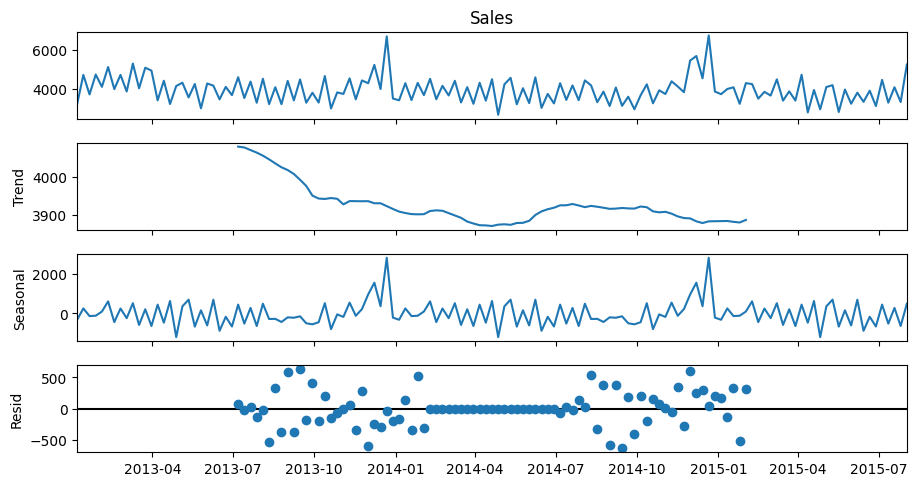

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(weekly_sales)

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(10, 5)

You can also access individual components

In [ ]:
decomposition.seasonal

Date
2013-01-06   -327.191627
2013-01-13    243.811807
2013-01-20   -142.671709
2013-01-27   -124.026105
2013-02-03     87.040378
                 ...    
2015-07-05    434.857595
2015-07-12   -522.664841
2015-07-19    267.685433
2015-07-26   -642.025418
2015-08-02    480.893538
Freq: W-SUN, Name: seasonal, Length: 135, dtype: float64

In [ ]:
decomposition.trend.iloc[50:70]

Date
2013-12-22    3922.320055
2013-12-29    3914.806319
2014-01-05    3907.810440
2014-01-12    3903.956044
2014-01-19    3901.141484
2014-01-26    3900.501374
2014-02-02    3900.939560
2014-02-09    3909.304945
2014-02-16    3911.160714
2014-02-23    3909.987637
2014-03-02    3903.824176
2014-03-09    3897.839286
2014-03-16    3891.219780
2014-03-23    3881.192308
2014-03-30    3876.026099
2014-04-06    3871.502747
2014-04-13    3870.993132
2014-04-20    3869.440934
2014-04-27    3873.009615
2014-05-04    3874.005495
Freq: W-SUN, Name: trend, dtype: float64

In [ ]:
decomposition.seasonal.head(5)

Date
2013-01-06   -327.191627
2013-01-13    243.811807
2013-01-20   -142.671709
2013-01-27   -124.026105
2013-02-03     87.040378
Freq: W-SUN, Name: seasonal, dtype: float64

# <font color='red'> Exercise 2: Decomposing a time series

Let's use a new dataset, this time sales from Walmart, and put our time series skills to use.

In [ ]:
walmart = pd.read_csv('walmart.csv')
walmart.head()

,Date,Sales
0,2010-02-07,1967220.53
1,2010-02-14,2030933.46
2,2010-02-21,1970274.64
3,2010-02-28,1817850.32
4,2010-03-07,1939980.43


#### First of all make sure the `Date` column has the correct type

#### What granularity is the data?

#### Set the index to be the `Date` column for easier manipulation

#### First step: plot the data. What are your first impressions?

#### Create a decomposition plot for the sales data. What do you see?

# <font color='blue'>Autocorrelation
    
In time series data, autocorrelation is a measure of how correlated a variable is *with itself*.

Specifically, autocorrelation measures how closely related earlier values are with values that occur later in time.

Examples of autocorrelation include:

- In stock market data, the stock price at one point is correlated with the stock
price of the point that's directly prior in time.
- In sales data, sales on a Saturday are likely correlated with
sales on the next Saturday and the previous Saturday, as well as other days, to more
or less of an extent.

`statsmodels` comes with some convenient packages for calculating and plotting autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

We can choose the "lags" i.e. how many time periods (in this case weeks) to go back

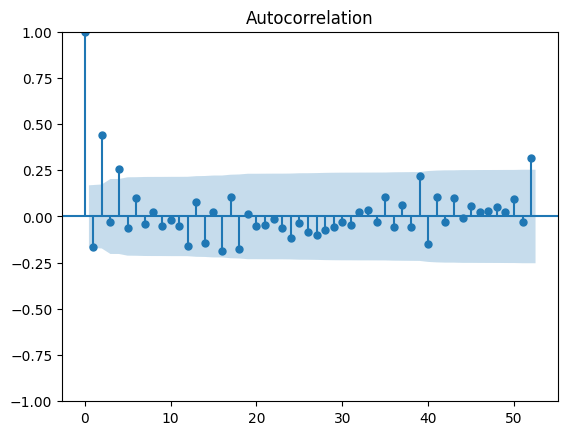

In [ ]:
plot_acf(weekly_sales, lags=52);

This tells us that previous values are correlated with subsequent values, i.e. the series is autocorrelated. The shaded area means "statistically not significant".

Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, controlling for the effect of previous lags.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

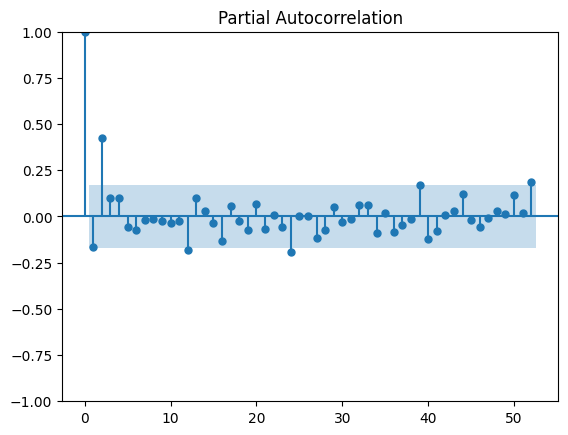

In [ ]:
plot_pacf(weekly_sales, lags=52);

This now tells us that **once you control for the effect of multiple lags**, the value 2 weeks ago is informative, as well as the value a year ago. There's an interesting artefact at 39 weeks (possibly because we don't have enough full years of data) and a few weak negative correlations. Overall there is clearly some seasonality.

# <font color='blue'>Forecasting time series

Let's briefly look at what it looks like to forecast time series and how it's different from machine learning.
    
For this we will look at the ARIMA class of models.
    
ARIMA stands for Auto-Regressive Integrated Moving Average.

- "Auto-regressive": "values depend on past values"
- "Integrated": "remove the trend and forecast the underlying movement separately"
- "Moving average": "use previous errors as they are also informative"

You need to choose some parameters:

- `p`: how much lag in the auto-regressive term? (how far back should I go?) (AR)
- `d`: differencing term (how much "differencing" to make it stationary, i.e. remove the trend?) (I)
- `q`: how much lag to add to the error terms (MA)

ARIMA is just a family of models, with many extensions

- "SARIMA": seasonal ARIMA
- "ARIMAX": ARIMA with the ability to add additional features
- "SARIMAX": combination of the two


First we still need to do a train-test split to train on some data and test on the rest.

The key difference is the split is not random, it's in time

In [ ]:
# note we usually need the `float` type for forecasting to work

train = weekly_sales["2013":"2014"].astype(float) # 2 full years
test = weekly_sales["2015"].astype(float) # most of 2015

train.head()

Date
2013-01-06    3223.333333
2013-01-13    4707.428571
2013-01-20    3711.142857
2013-01-27    4724.428571
2013-02-03    4099.000000
Freq: W-SUN, Name: Sales, dtype: float64

In [ ]:

test.tail()

Date
2015-07-05    4453.571429
2015-07-12    3291.571429
2015-07-19    4078.285714
2015-07-26    3322.285714
2015-08-02    5235.600000
Freq: W-SUN, Name: Sales, dtype: float64

Plot the training and test sets

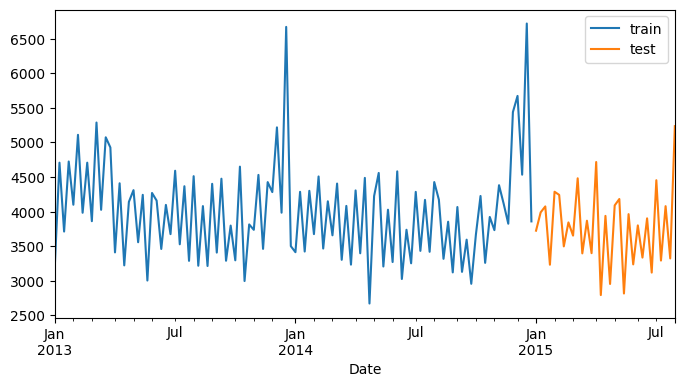

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

train.plot(ax=ax, label="train")
test.plot(ax=ax, label="test")
ax.legend()

plt.show()

Let's see what a baseline ARIMA model does (without taking seasonality into account)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 0, 1)).fit()

y_pred = model.predict(start="2015-01-04", end="2015-08-02")

Plot the data plus the forecast

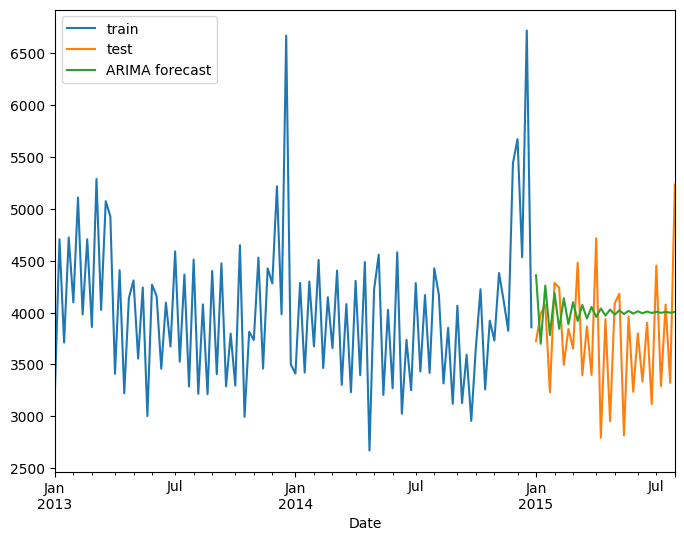

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

train.plot(ax=ax, label="train")
test.plot(ax=ax, label="test")
y_pred.plot(ax=ax, label="ARIMA forecast")
ax.legend()

plt.show()

This is typical behaviour from an ARIMA model. It can forecast a few values into the future, but then regresses to a mean prediction.

To make use of the obvious seasonality in our data, we should try the seasonal variation, SARIMA.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

seasonal_model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 0, 0, 52), freq="W").fit()
y_pred_seasonal = seasonal_model.predict(start="2015-01-04", end="2015-08-02")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


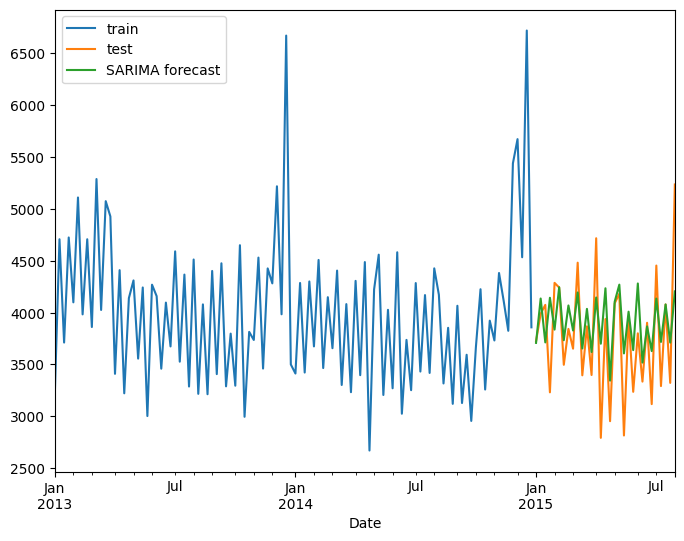

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

train.plot(ax=ax, label="train")
test.plot(ax=ax, label="test")
y_pred_seasonal.plot(ax=ax, label="SARIMA forecast")
ax.legend()

plt.show()

Because this is really a regression problem (albeit in time) we can also get a Root Mean Squared Error to compare our predictions to the true values

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

arima_RMSA = np.sqrt(mean_squared_error(test, y_pred))
sarima_RMSA = np.sqrt(mean_squared_error(test, y_pred_seasonal))

print("ARIMA RMSE:", arima_RMSA)
print("SARIMA RMSE:", sarima_RMSA)

ARIMA RMSE: 622.9647123845517
SARIMA RMSE: 431.2634818266888


Especially when you look at the seasonal variant of ARIMA (i.e. SARIMA) there are a lot of parameters... how do we pick the right ones?

- one option is to eyeball various plots and have a good guess: [Rules for identifying ARIMA models](https://people.duke.edu/~rnau/arimrule.htm)
- another is to effectively do a grid search: trying different combinations of values and comparing their error
- R has a nice auto-ARIMA package that picks the "best" ARIMA for you, and it seems Python has some options too: [auto-ARIMA for Python?](https://stackoverflow.com/questions/22770352/auto-arima-equivalent-for-python)

## Let's try another approach - Facebook's Prophet library

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [ ]:
df.head(7)

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,
2013-01-01,2,0,0,0,0,a,1,2013,1
2013-01-02,3,5530,668,1,0,0,1,2013,1
2013-01-03,4,4327,578,1,0,0,1,2013,1
2013-01-04,5,4486,619,1,0,0,1,2013,1
2013-01-05,6,4997,635,1,0,0,1,2013,1
2013-01-06,7,0,0,0,0,0,1,2013,1
2013-01-07,1,7176,785,1,1,0,1,2013,1


In [ ]:
daily_train = df["Sales"].loc["2013":"2014"].astype(float)
daily_test = df["Sales"].loc["2015"].astype(float)

daily_train.tail()

Date
2014-12-27    6057.0
2014-12-28       0.0
2014-12-29    6463.0
2014-12-30    6466.0
2014-12-31    2605.0
Name: Sales, dtype: float64

In [ ]:
daily_test.head()

Date
2015-01-01       0.0
2015-01-02    5509.0
2015-01-03    5023.0
2015-01-04       0.0
2015-01-05    6239.0
Name: Sales, dtype: float64

Prophet needs the data to be two columns exactly called `ds` and `y`...

Give it the **training** data

In [ ]:
prophet_data = daily_train.reset_index()
prophet_data.columns = ["ds", "y"]
prophet_data.head()

,ds,y
0,2013-01-01,0.0
1,2013-01-02,5530.0
2,2013-01-03,4327.0
3,2013-01-04,4486.0
4,2013-01-05,4997.0


We need to deal with days the store isn't open. Rather than smooth the time series, we can tell Prophet days where the store is closed. This information **should** give us better predictions.

In [ ]:
df[df["Open"] == 0].index

DatetimeIndex(['2013-01-01', '2013-01-06', '2013-01-13', '2013-01-20',
               '2013-01-27', '2013-02-03', '2013-02-10', '2013-02-17',
               '2013-02-24', '2013-03-03',
               ...
               '2015-05-31', '2015-06-04', '2015-06-07', '2015-06-14',
               '2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
               '2015-07-19', '2015-07-26'],
              dtype='datetime64[ns]', name='Date', length=161, freq=None)

In [ ]:
sundays = pd.DataFrame({
  'holiday': 'closed',
  'ds': df[df["Open"] == 0].index
})

sundays.head()

,holiday,ds
0,closed,2013-01-01
1,closed,2013-01-06
2,closed,2013-01-13
3,closed,2013-01-20
4,closed,2013-01-27


In [ ]:
model = Prophet(holidays=sundays)
model.fit(prophet_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_71olp22/gojdr1h5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_71olp22/s0_m1j47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8849', 'data', 'file=/tmp/tmp_71olp22/gojdr1h5.json', 'init=/tmp/tmp_71olp22/s0_m1j47.json', 'output', 'file=/tmp/tmp_71olp22/prophet_modelx3maz79g/prophet_model-20240603040741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:07:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:07:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Make a future dataframe, which contains dates in the future we also want to forecast (let's say 6 months here too)

In [ ]:
daily_test.tail()

Date
2015-07-27    6102.0
2015-07-28    5011.0
2015-07-29    4782.0
2015-07-30    5020.0
2015-07-31    5263.0
Name: Sales, dtype: float64

In [ ]:
daily_test.shape

(212,)

In [ ]:
future = model.make_future_dataframe(periods=212)
future.tail()

,ds
937,2015-07-27
938,2015-07-28
939,2015-07-29
940,2015-07-30
941,2015-07-31


In [ ]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,closed,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,5093.735496,-949.163505,1450.451687,5093.735496,5093.735496,-4831.851897,-4831.851897,-4831.851897,-4758.80724,...,-4758.80724,-4758.80724,-4758.80724,-73.044657,-73.044657,-73.044657,0.0,0.0,0.0,261.883599
1,2013-01-02,5092.307146,3769.634078,6089.529552,5092.307146,5092.307146,-204.767933,-204.767933,-204.767933,0.00000,...,0.00000,0.00000,0.00000,-204.767933,-204.767933,-204.767933,0.0,0.0,0.0,4887.539213
2,2013-01-03,5090.878795,3672.788205,5964.649149,5090.878795,5090.878795,-286.033418,-286.033418,-286.033418,0.00000,...,0.00000,0.00000,0.00000,-286.033418,-286.033418,-286.033418,0.0,0.0,0.0,4804.845377
3,2013-01-04,5089.450445,4029.554433,6288.716620,5089.450445,5089.450445,6.637740,6.637740,6.637740,0.00000,...,0.00000,0.00000,0.00000,6.637740,6.637740,6.637740,0.0,0.0,0.0,5096.088185
4,2013-01-05,5088.022094,4047.858441,6431.556960,5088.022094,5088.022094,189.533122,189.533122,189.533122,0.00000,...,0.00000,0.00000,0.00000,189.533122,189.533122,189.533122,0.0,0.0,0.0,5277.555216


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
935,2015-07-25,6488.779968,5408.198106,7679.767210
936,2015-07-26,1489.254941,335.544419,2617.625949
937,2015-07-27,6732.507782,5541.990508,7833.013170
938,2015-07-28,6240.603313,4964.996042,7369.954068
939,2015-07-29,6113.680412,4970.119146,7318.657714
940,2015-07-30,6037.215301,4913.656361,7270.057508
941,2015-07-31,6334.686835,5189.361504,7552.552313


In [ ]:
prophet_predictions = forecast.set_index("ds")["yhat"].loc["2015"]

prophet_predictions.head()

ds
2015-01-01     270.329375
2015-01-02    5326.608148
2015-01-03    5514.303905
2015-01-04     514.778877
2015-01-05    5758.031718
Name: yhat, dtype: float64

In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

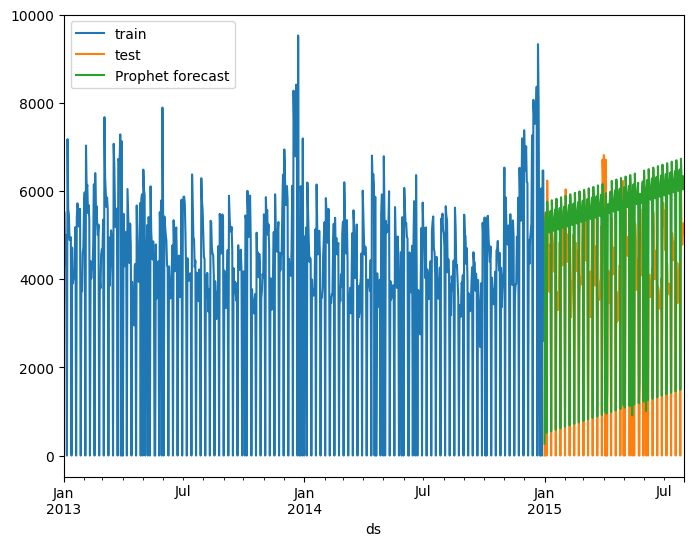

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

daily_train.plot(ax=ax, label="train")
daily_test.plot(ax=ax, label="test")
prophet_predictions.plot(ax=ax, label="Prophet forecast")
ax.legend()

plt.show()

In [ ]:
prophet_RMSE = np.sqrt(mean_squared_error(daily_test, prophet_predictions))
print("Prophet RMSE:", prophet_RMSE)

Prophet RMSE: 1485.5552091286456


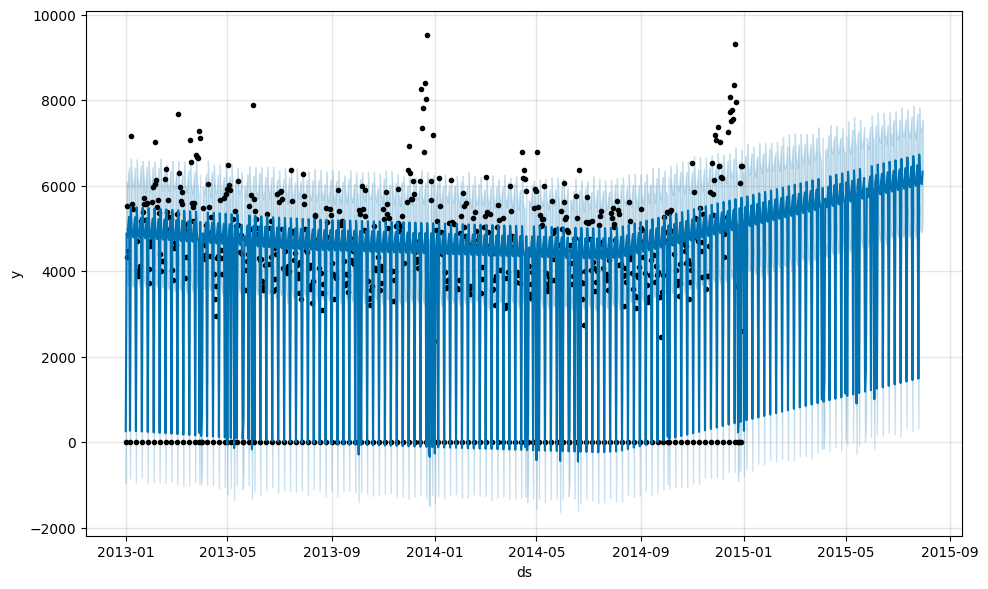

In [ ]:
fig1 = model.plot(forecast)

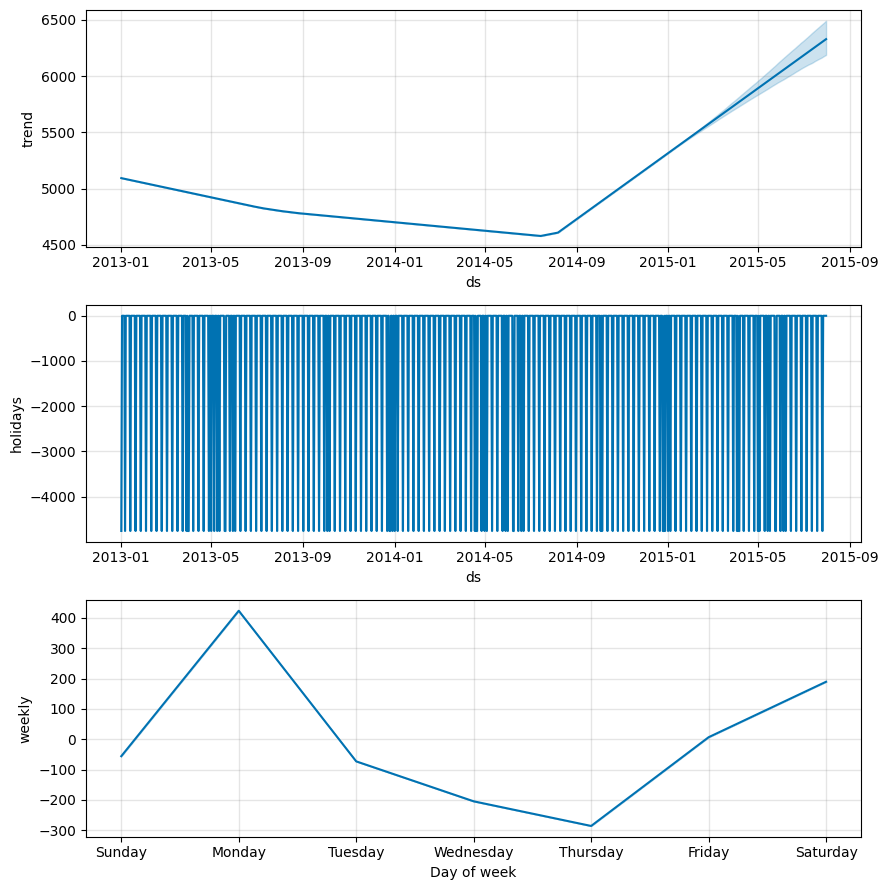

In [ ]:
model.plot_components(forecast);

Or an interactive plot!

In [ ]:
from prophet.plot import plot_plotly

plot_plotly(model, forecast)

There are even ways to account for things like COVID!

https://facebook.github.io/prophet/docs/handling_shocks.html#treating-covid-19-lockdowns-as-a-one-off-holidays

# <font color='red'> Exercise 3: Forecasting

#### First, plot autocorrelation and partial autocorrelation plots for your Walmart data.

What do you conclude?

#### Now let's try forecasting!

Try changing the values for the parameters `p`, `d`, and `q` in the ARIMA forecast below to see how the forecast changes.

In [ ]:
train

Date
2013-01-06    3223.333333
2013-01-13    4707.428571
2013-01-20    3711.142857
2013-01-27    4724.428571
2013-02-03    4099.000000
                 ...     
2014-11-30    5439.285714
2014-12-07    5672.714286
2014-12-14    4533.714286
2014-12-21    6720.142857
2014-12-28    3858.000000
Freq: W-SUN, Name: Sales, Length: 104, dtype: float64

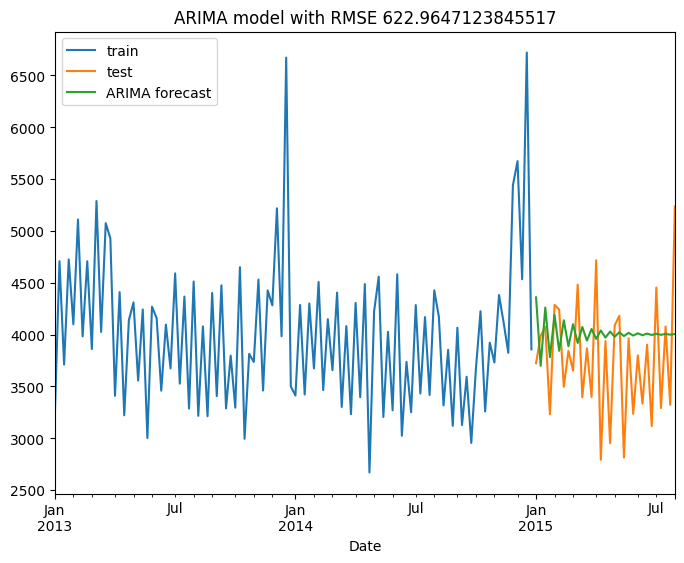

In [ ]:
p = 1
d = 0
q = 1

###### ARIMA boilerplate code:
model = ARIMA(train, order=(p, d, q)).fit()

y_pred = model.predict(start="2015-01-04", end="2015-08-02")

fig, ax = plt.subplots(figsize=(8, 6))

train.plot(ax=ax, label="train")
test.plot(ax=ax, label="test")
y_pred.plot(ax=ax, label="ARIMA forecast")
ax.legend()

rmse = np.sqrt(mean_squared_error(test, y_pred))

ax.set_title(f"ARIMA model with RMSE {rmse}")

plt.show()

Now try the same but with SARIMAX, to include seasonality.

Again, try different values for the different parameters to see how the model (and its RMSE) changes.

Time series forecasting gets complicated here, there are 6 parameters to change!

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



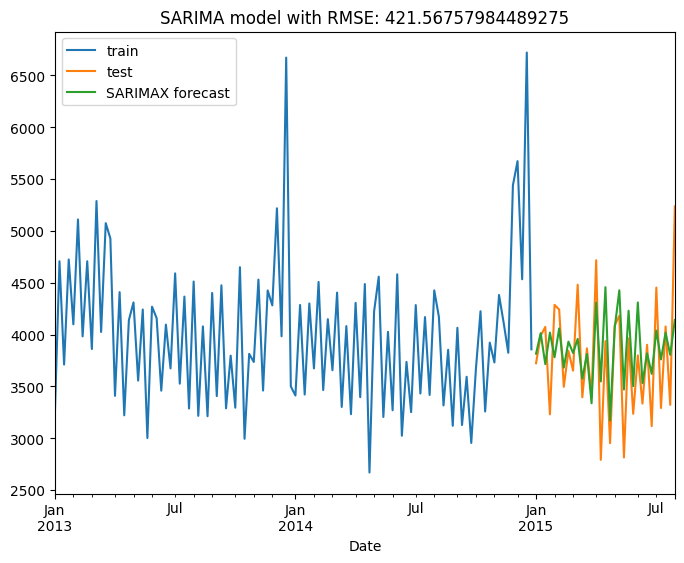

In [ ]:
p = 1
d = 0
q = 1
P = 1
D = 0
Q = 1

#### boilerplate SARIMA code

seasonal_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, 52), freq="W").fit()
y_pred_seasonal = seasonal_model.predict(start="2015-01-04", end="2015-08-02")

fig, ax = plt.subplots(figsize=(8, 6))

train.plot(ax=ax, label="train")
test.plot(ax=ax, label="test")
y_pred_seasonal.plot(ax=ax, label="SARIMAX forecast")
ax.legend()

rmse = np.sqrt(mean_squared_error(test, y_pred_seasonal))
ax.set_title(f"SARIMA model with RMSE: {rmse}")

plt.show()

# <font color='blue'>Using machine learning to make forecasts

So far we have seen how to apply traditional time series approaches in Python. Let's now switch our attention to machine learning models...

We will use the (in)famous XGBoost method

In [ ]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

df = pd.read_csv('walmart.csv')
df.head()

,Date,Sales
0,2010-02-07,1967220.53
1,2010-02-14,2030933.46
2,2010-02-21,1970274.64
3,2010-02-28,1817850.32
4,2010-03-07,1939980.43


In [ ]:
# index the data
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.tail()

,Sales
Date,
2012-09-30,1927664.11
2012-10-07,2041918.74
2012-10-14,1999079.44
2012-10-21,2018010.15
2012-10-28,2035189.66


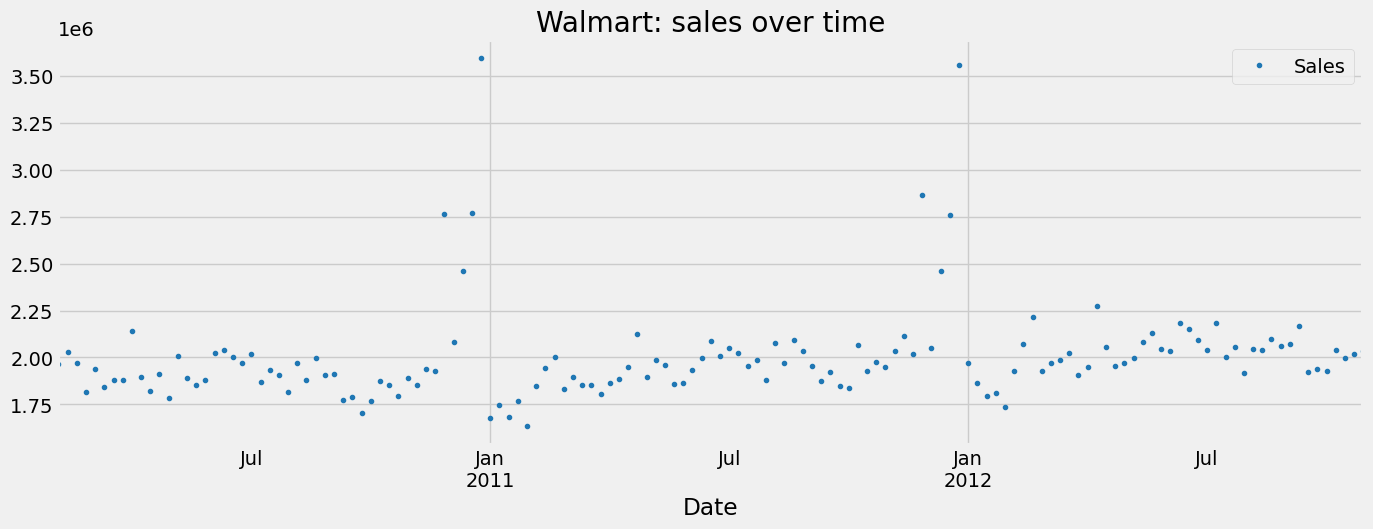

In [ ]:
# plot time series data
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Walmart: sales over time')
plt.show()

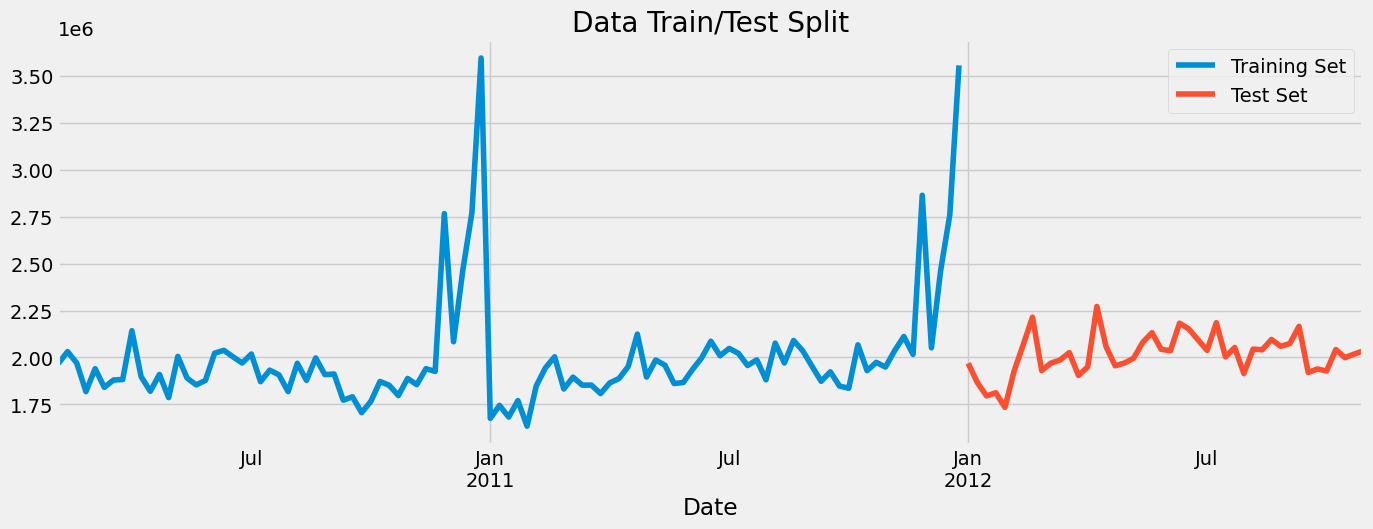

In [ ]:
# make train and test split
train = df.loc[df.index < '01-01-2012']
test = df.loc[df.index >= '01-01-2012']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

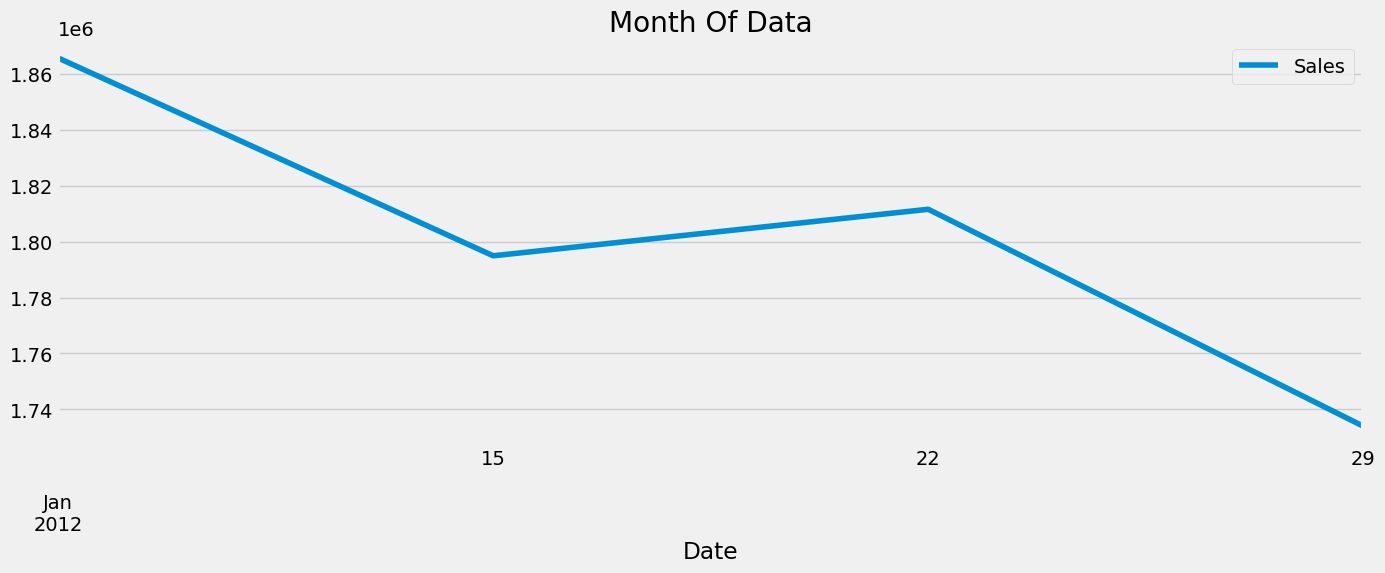

In [ ]:
df.loc[(df.index > '01-01-2012') & (df.index < '01-31-2012')] \
    .plot(figsize=(15, 5), title='Month Of Data')
plt.show()


In [ ]:
# boilerplate function to make features
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [ ]:
df = create_features(df)

df.head()

,Sales,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,
2010-02-07,1967220.53,0,6,1,2,2010,38,7,5
2010-02-14,2030933.46,0,6,1,2,2010,45,14,6
2010-02-21,1970274.64,0,6,1,2,2010,52,21,7
2010-02-28,1817850.32,0,6,1,2,2010,59,28,8
2010-03-07,1939980.43,0,6,1,3,2010,66,7,9


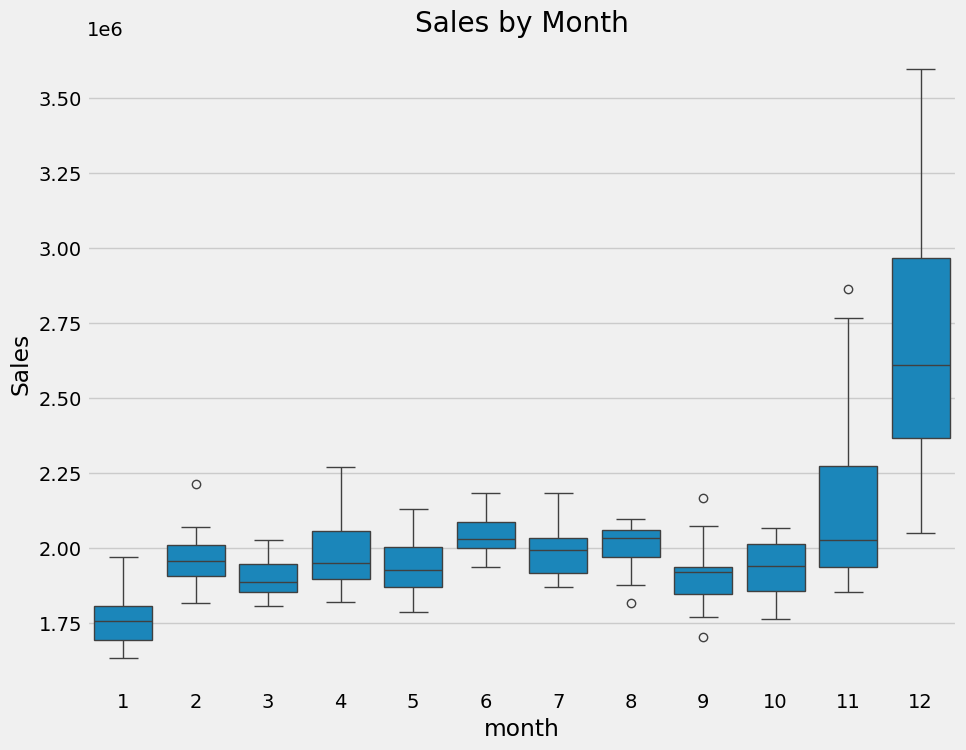

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Sales')
ax.set_title('Sales by Month')
plt.show()

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['weekofyear', 'quarter', 'month', 'year']
TARGET = 'Sales'

In [ ]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
# fit the model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=10,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:2002672.91004	validation_1-rmse:1998535.50911
[100]	validation_0-rmse:774651.52291	validation_1-rmse:806078.92852
[200]	validation_0-rmse:325889.06566	validation_1-rmse:377931.15340
[300]	validation_0-rmse:153964.36250	validation_1-rmse:221478.13028


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:07:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.



[400]	validation_0-rmse:80662.53576	validation_1-rmse:166387.85925
[500]	validation_0-rmse:47375.99301	validation_1-rmse:146078.03468
[600]	validation_0-rmse:30267.83337	validation_1-rmse:137955.88120
[700]	validation_0-rmse:19246.57323	validation_1-rmse:135813.12574
[800]	validation_0-rmse:13264.39332	validation_1-rmse:134769.08240
[900]	validation_0-rmse:9293.22123	validation_1-rmse:134709.71923
[918]	validation_0-rmse:8734.49664	validation_1-rmse:134735.51726


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

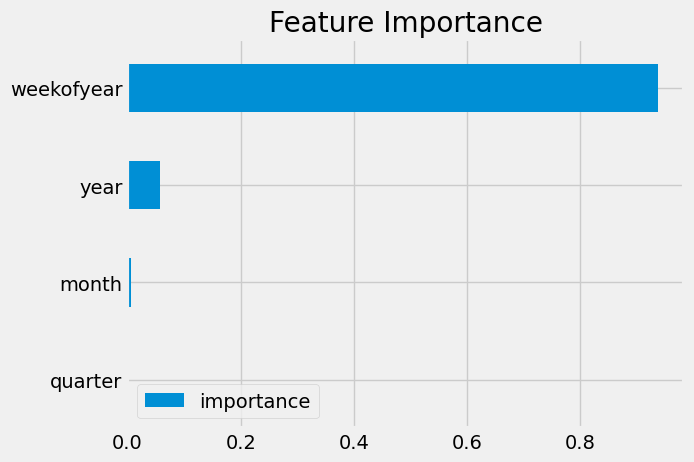

In [ ]:
# what are the problems with highly correlated features?
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

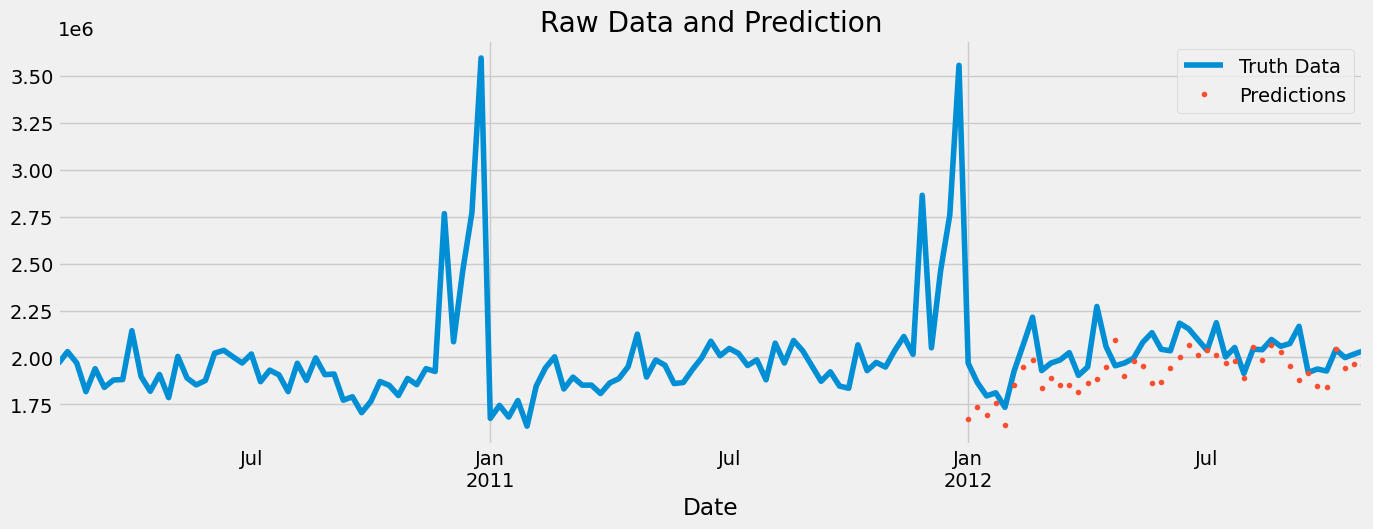

In [ ]:
ax = df[['Sales']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

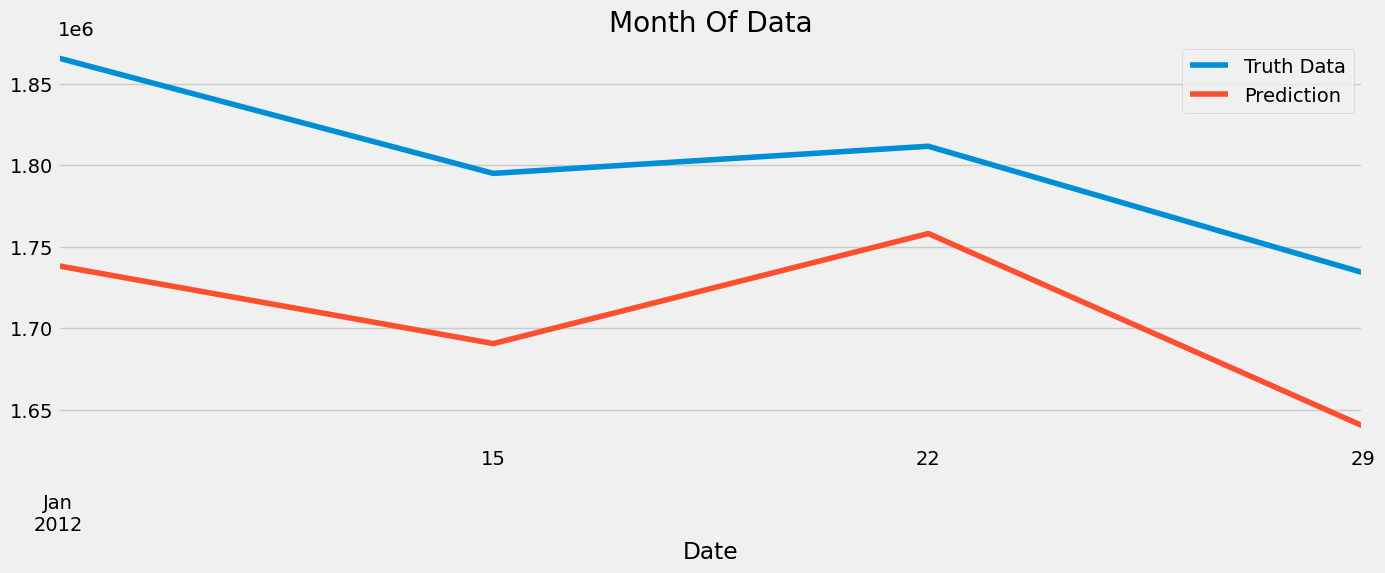

RMSE Score on Test set: 134647.51


date
2012-04-08    383991.135
2012-01-01    297141.160
2012-09-09    286245.685
2012-05-20    266027.175
2012-02-19    227180.685
2012-06-10    182345.275
2012-07-08    174432.100
2012-05-27    172286.660
2012-03-18    172165.495
2012-04-22    137096.755
Name: error, dtype: float64

In [ ]:
ax = df.loc[(df.index > '01-01-2012') & (df.index < '31-01-2012')]['Sales'] \
    .plot(figsize=(15, 5), title='Month Of Data')
df.loc[(df.index > '01-01-2012') & (df.index < '31-01-2012')]['prediction'] \
    .plot()
plt.legend(['Truth Data','Prediction'])
plt.show()

score = np.sqrt(mean_squared_error(test['Sales'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

# Challenge: who can make the best prediction?

- Based on the Rossman data
- For the perriod start="2015-01-04", end="2015-08-02"
- Using any method
- Judged based on RMSE
